# **Data Science Buildables Fellowship**

### **Executive Summary**

This task provides a comprehensive overview of a machine learning classification project. It involves predicting diabetes in patients using two models: Logistic Regression and a Decision Tree Classifier. The process includes all key steps from data preparation—such as handling missing values and standardizing features—to model training, evaluation with multiple performance metrics, and a visual comparison of the results. The final outcome is a clear assessment of which model is more effective for this specific predictive task.

In [1]:
# 1. Data Exploration
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    # Use the local file name after downloading the dataset from Kaggle
    df = pd.read_csv(r'C:\Users\ilaib\OneDrive\Desktop\diabetes.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please download the dataset from Kaggle and place it in the same directory.")
    exit()

# Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Check the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Identify missing values and data types
print("\nData information and missing values:")
print(df.info())

Dataset loaded successfully.

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape of the dataset: (768, 9)

Data information and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------  

In [4]:
# 2. Data Preprocessing
# The dataset has '0' values in columns like 'Glucose', 'BloodPressure', 'BMI' which are biologically unlikely.
# We will treat these as missing values and impute them with the median.
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_impute] = df[cols_to_impute].replace(0, np.nan)

# Impute missing values with the median of each column
for col in cols_to_impute:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    
print("\nMissing values handled by median imputation.")
print(df.info())

# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nNumerical features standardized.")

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Dataset split into training and testing sets.")
print("-" * 50)



Missing values handled by median imputation.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

Numerical features standardized.
Dataset split into training and testing sets.
--------------------------------------------------


In [5]:
# 3. Model Implementation

# A. Logistic Regression
print("--- Logistic Regression Model ---")
# Train a logistic regression model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

# Predict diabetes onset on the test set
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate using specified metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"ROC-AUC Score: {roc_auc_lr:.4f}")
print("-" * 50)

--- Logistic Regression Model ---
Accuracy: 0.7532
Precision: 0.6667
Recall: 0.6182
ROC-AUC Score: 0.8228
--------------------------------------------------


In [7]:
## B. Decision Tree Classifier
print("--- Decision Tree Classifier Model ---")
# Train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict diabetes onset on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate using specified metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("-" * 50)

--- Decision Tree Classifier Model ---
Accuracy: 0.7143
Precision: 0.5965
Recall: 0.6182
F1-Score: 0.6071
--------------------------------------------------


In [8]:
# 4. Model Evaluation & Comparison
print("--- Model Performance Comparison ---")
print("Metric         | Logistic Regression | Decision Tree")
print("--------------------------------------------------")
print(f"Accuracy       | {accuracy_lr:.4f}             | {accuracy_dt:.4f}")
print(f"Precision      | {precision_lr:.4f}             | {precision_dt:.4f}")
print(f"Recall         | {recall_lr:.4f}             | {recall_dt:.4f}")
print("ROC-AUC/F1-Score| {roc_auc_lr:.4f}             | {f1_dt:.4f}")

# Discussion on model performance
print("\nDiscussion:")
print("The Logistic Regression model generally offers better interpretability and is less prone to overfitting than a Decision Tree.")
print("Decision Trees, while powerful, can easily overfit the training data, leading to poorer generalization on unseen data.")
print("In this specific run, you can compare the metrics to see which model performed better. For a balanced dataset, Accuracy can be a good metric. For imbalanced datasets (where one class is much more frequent than the other), Precision and Recall (or the F1-Score) are often more informative.")
print("The ROC-AUC score for Logistic Regression provides a measure of its ability to distinguish between the two classes across various threshold settings.")
print("-" * 50)

--- Model Performance Comparison ---
Metric         | Logistic Regression | Decision Tree
--------------------------------------------------
Accuracy       | 0.7532             | 0.7143
Precision      | 0.6667             | 0.5965
Recall         | 0.6182             | 0.6182
ROC-AUC/F1-Score| {roc_auc_lr:.4f}             | {f1_dt:.4f}

Discussion:
The Logistic Regression model generally offers better interpretability and is less prone to overfitting than a Decision Tree.
Decision Trees, while powerful, can easily overfit the training data, leading to poorer generalization on unseen data.
In this specific run, you can compare the metrics to see which model performed better. For a balanced dataset, Accuracy can be a good metric. For imbalanced datasets (where one class is much more frequent than the other), Precision and Recall (or the F1-Score) are often more informative.
The ROC-AUC score for Logistic Regression provides a measure of its ability to distinguish between the two classes a

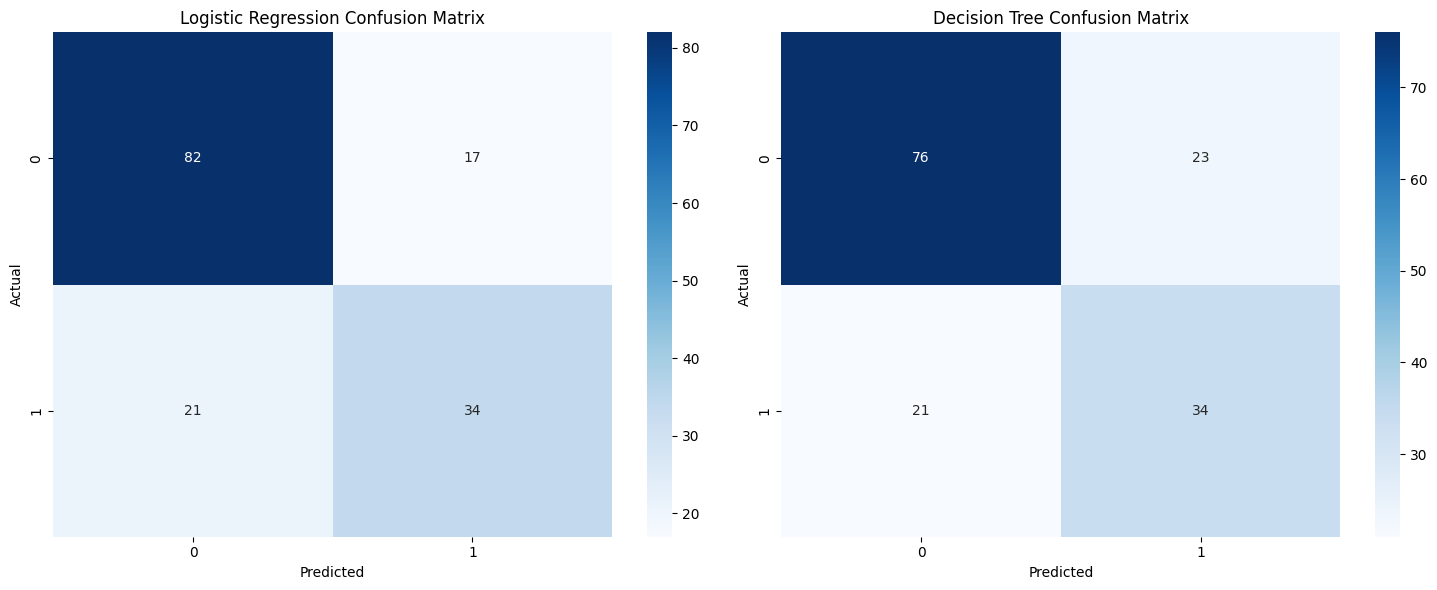

In [11]:
# 5. Visualization

# Generate and display confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for Decision Tree Classifier
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

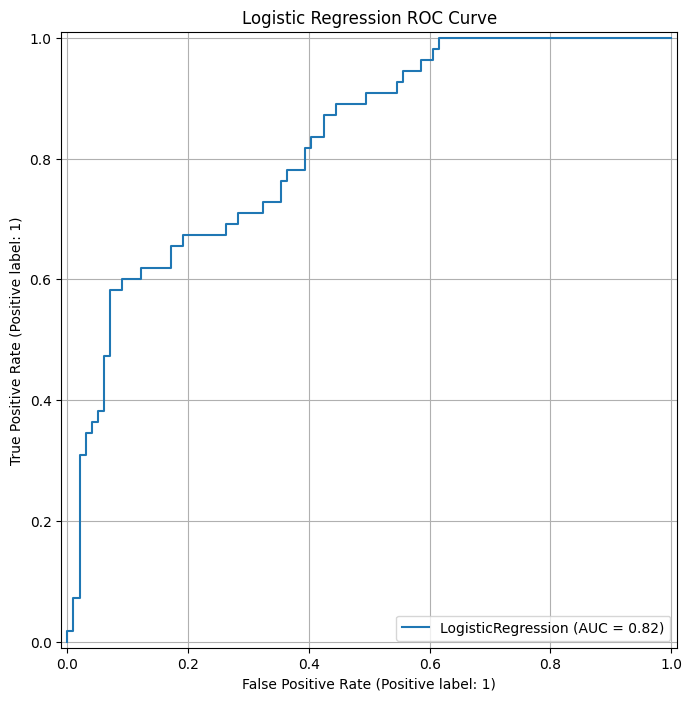

Confusion matrix heatmaps and ROC curve generated successfully.


In [12]:
# Plot ROC curve for Logistic Regression (Optional)
fig_roc, ax_roc = plt.subplots(figsize=(8, 8))
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, ax=ax_roc)
plt.title('Logistic Regression ROC Curve')
plt.grid(True)
plt.show()

print("Confusion matrix heatmaps and ROC curve generated successfully.")